In [9]:
import pandas as pd # type: ignore
from datetime import datetime # type: ignore
import numpy as np #type: ignore

import matplotlib # type: ignore
import matplotlib.pyplot as plt # type: ignore

from sklearn.metrics import mean_squared_error # type: ignore
from sklearn.utils.fixes import parse_version
from sklearn.inspection import permutation_importance

In [36]:
df = pd.read_csv('datasets/dataset_PS_4.csv')
df = df.astype({'date': 'datetime64[ns]'})
# df.drop(columns=['irradiation', 'cloudiness', 'holiday', 'precipitation'], inplace=True)
df['shifted_consumption_168'] = df['consumption'].shift(168)
df['shifted_consumption_48'] = df['consumption'].shift(48)
df['hour'] = df['date'].dt.hour
df['weekDay'] = df['date'].dt.weekday

# sort by holidays
df = df.sort_values(by='holiday')

holidays_map = {holiday: i for i, holiday in enumerate(df['holiday'].unique())}
df['holiday'] = df['holiday'].map(holidays_map)

# sort holidays
df = df.sort_values(by='date')
df.index = df['date']
df.drop(columns=['date'], inplace=True)

df = df.fillna(df.mean())
df

,consumption_eles_forecast,consumption,temperature,precipitation,irradiation,price,volumes,cloudiness,holiday,shifted_consumption_168,shifted_consumption_48,hour,weekDay
date,,,,,,,,,,,,,
2022-01-01 01:00:00,953.0,1018.0,-3.2,0.0,0.0,51.44327,1084.700,37.0,7,1294.81532,1293.575122,1,5
2022-01-01 02:00:00,906.0,975.0,-3.9,0.0,0.0,55.91396,1071.100,37.0,7,1294.81532,1293.575122,2,5
2022-01-01 03:00:00,874.0,944.0,-2.8,0.0,0.0,46.94279,1065.700,37.0,7,1294.81532,1293.575122,3,5
2022-01-01 04:00:00,870.0,936.0,-3.1,0.0,0.0,37.67210,1062.800,37.0,7,1294.81532,1293.575122,4,5
2022-01-01 05:00:00,892.0,952.0,-4.1,0.0,0.0,39.70000,1070.000,37.0,7,1294.81532,1293.575122,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-03 19:00:00,1758.0,1219.0,13.8,0.0,0.0,100.83000,1688.000,83.0,0,1267.00000,1109.000000,19,6
2024-11-03 20:00:00,1758.0,1219.0,13.8,0.0,0.0,100.83000,1959.700,83.0,0,1229.00000,1092.000000,20,6
2024-11-03 21:00:00,1758.0,1219.0,13.8,0.0,0.0,100.83000,1276.654,83.0,0,1183.00000,1027.000000,21,6


In [11]:
# add tommorow temp data and percipitation and cloudiness manually


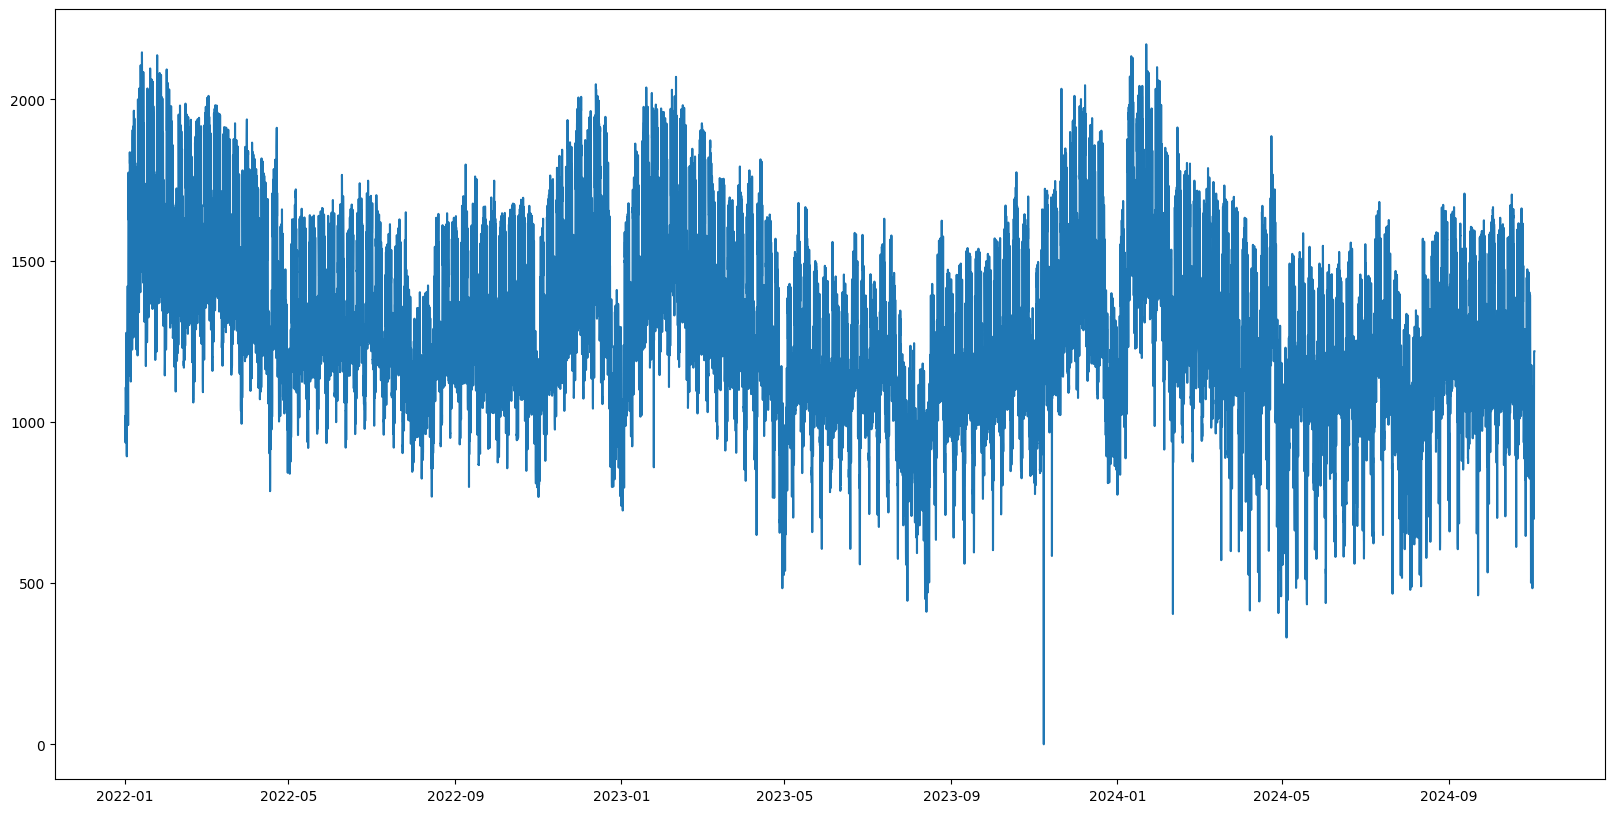

In [12]:
figure = plt.figure(figsize=(20, 10))
plt.plot(df['consumption'])

In [13]:
from sklearn.ensemble import GradientBoostingRegressor # type: ignore
from sklearn.metrics import mean_absolute_percentage_error # type: ignore

df_hourly = df.copy()
df_hourly['shifted_consumption_168'] = df_hourly['consumption'].shift(168)
df_hourly['shifted_consumption_48'] = df_hourly['consumption'].shift(48)
df_hourly['hour'] = df_hourly.index.hour
df_hourly['weekDay'] = df_hourly.index.weekday

# Split the dataset based on the cutoff date
cutoff_date = '2024-10-01 00:00:00'
train_data = df_hourly[df_hourly.index < cutoff_date].dropna(how='any')
test_data = df_hourly[df_hourly.index >= cutoff_date]

In [14]:
test_data

,consumption_eles_forecast,consumption,temperature,precipitation,irradiation,price,volumes,cloudiness,holiday,shifted_consumption_168,shifted_consumption_48,hour,weekDay
date,,,,,,,,,,,,,
2024-10-01 00:00:00,2259.0,1149.0,5.8,0.0,0.0,3.21,842.200,80.0,0,1117.0,960.0,0,1
2024-10-01 01:00:00,2162.0,1073.0,5.6,0.0,0.0,0.07,779.600,80.0,0,1066.0,928.0,1,1
2024-10-01 02:00:00,2129.0,1048.0,5.4,0.0,0.0,0.05,708.700,80.0,0,1039.0,899.0,2,1
2024-10-01 03:00:00,2133.0,1062.0,5.3,0.0,0.0,0.02,699.900,80.0,0,1068.0,860.0,3,1
2024-10-01 04:00:00,2185.0,1060.0,4.8,0.0,0.0,0.09,847.100,80.0,0,1079.0,861.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-02 19:00:00,2354.0,1219.0,13.8,0.0,0.0,100.83,1546.887,83.0,0,1274.0,1166.0,19,5
2024-11-02 20:00:00,2244.0,1219.0,13.8,0.0,0.0,100.83,1467.100,83.0,0,1288.0,1104.0,20,5
2024-11-02 21:00:00,2100.0,1219.0,13.8,0.0,0.0,100.83,1365.087,83.0,0,1238.0,1032.0,21,5


In [23]:
# X_train = train_data[['shifted_consumption_168','hour','weekDay','shifted_consumption_48', 'temperature', 'holiday', 'cloudiness', 'precipitation', 'irradiation', 'Price']]
# X_test = test_data[['shifted_consumption_168','hour','weekDay','shifted_consumption_48', 'temperature', 'holiday', 'cloudiness', 'precipitation', 'irradiation', 'Price']]

X_train = train_data[['shifted_consumption_168','hour','weekDay','shifted_consumption_48', 'holiday', 'volumes']]
X_test = test_data[['shifted_consumption_168','hour','weekDay','shifted_consumption_48', 'holiday', 'volumes']]
y_train = train_data['consumption']
y_test = test_data['consumption']

reg = GradientBoostingRegressor(random_state=0,
								learning_rate=0.1,
								n_estimators=200,
								max_depth=5, 
								min_samples_split=10)
reg.fit(X_train, y_train)
forecast = pd.Series(reg.predict(X_test), index=X_test.index, name='consumption')

In [24]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error # type: ignore
from sktime.performance_metrics.forecasting import mean_squared_percentage_error # type: ignore

mse = root_mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)
mape = mean_absolute_percentage_error(y_test, forecast)
rmspe = mean_squared_percentage_error(y_test, forecast, square_root=True)

plt_title = 'MAE: {0:.2f}, RMSE: {1:.2f}, MAPE: {2:.2f}, RMSPE: {3:.2f}'.format(mae, mse, mape*100, rmspe*100)

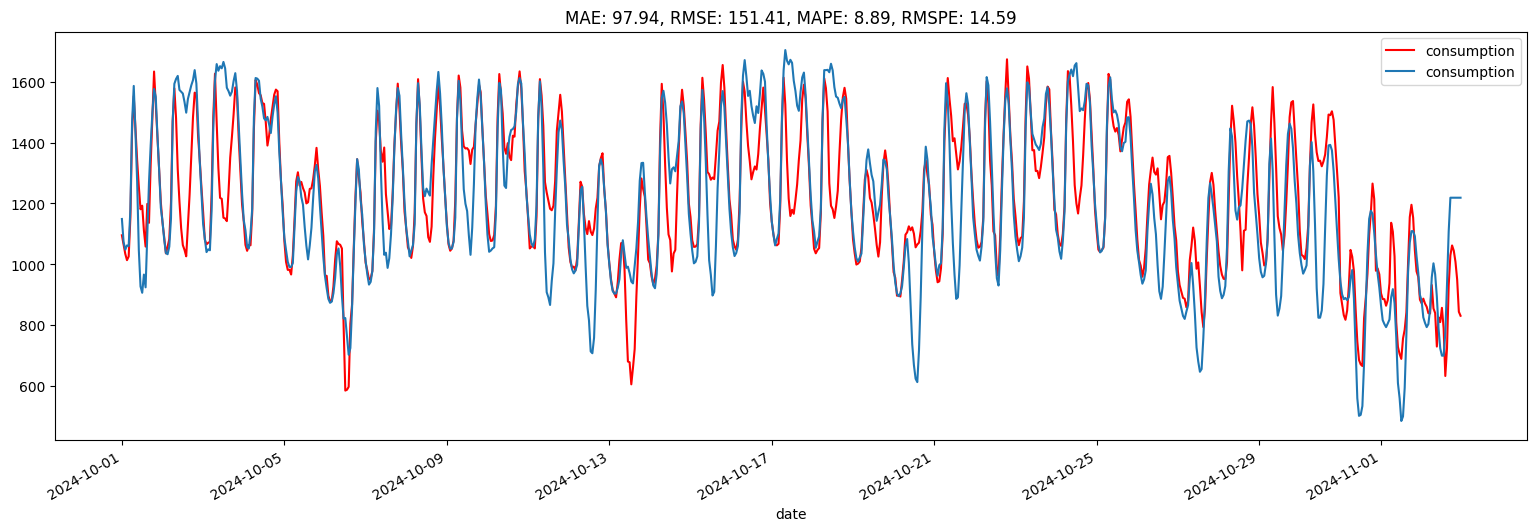

In [25]:
# forecast.index = date['date']
# y_test.index = date['date']
forecast.plot(title=plt_title,figsize=(19, 6),legend=True, color='red')
ax = y_test.plot(title=plt_title,figsize=(19, 6), legend=True)
# add date to plot as x axis

#### Feature importance

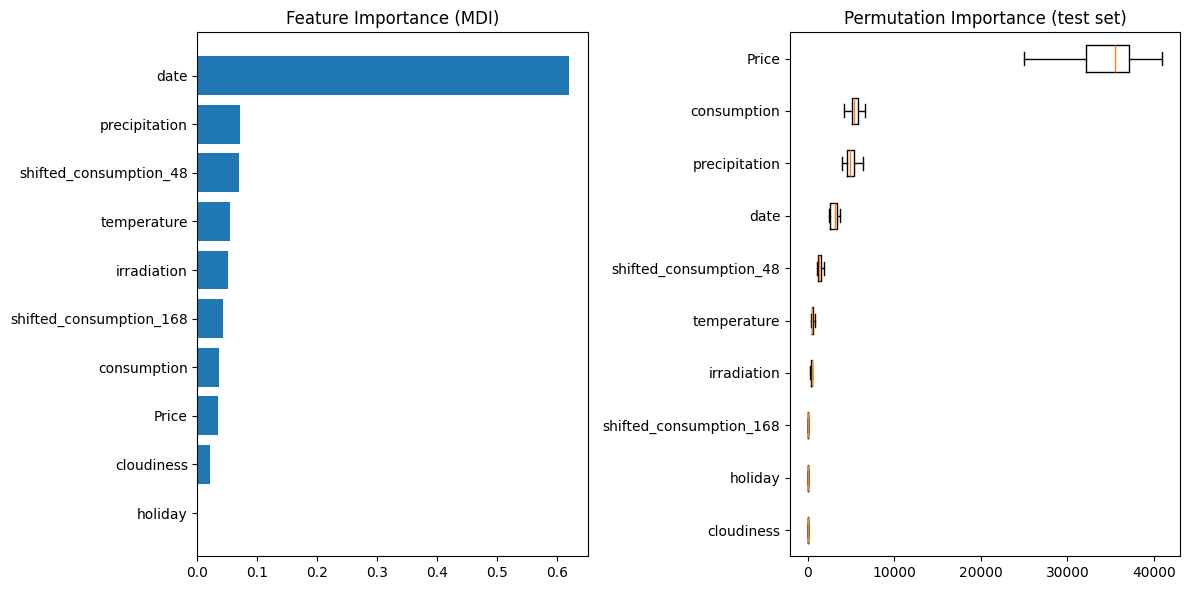

In [64]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + 0.5

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_hourly.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, forecast, n_repeats=10, random_state=0, n_jobs=2, 
	scoring='neg_mean_squared_error'
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)

# `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
# renamed to `tick_labels`. The following code handles this, but as a
# scikit-learn user you probably can write simpler code by using `labels=...`
# (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
tick_labels_parameter_name = (
    "tick_labels"
    if parse_version(matplotlib.__version__) >= parse_version("3.9")
    else "labels"
)
tick_labels_dict = {
    tick_labels_parameter_name: np.array(df_hourly.columns)[sorted_idx]
}
plt.boxplot(result.importances[sorted_idx].T, vert=False, **tick_labels_dict)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### HistGradientBoostingRegressor

In [37]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor(random_state=0,
									learning_rate=0.1,
									loss='squared_error',
									max_iter=5000)
reg.fit(X_train, y_train)
forecast = pd.Series(reg.predict(X_test), index=X_test.index, name='consumption')

In [38]:
mse = root_mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)
mape = mean_absolute_percentage_error(y_test, forecast)
rmspe = mean_squared_percentage_error(y_test, forecast, square_root=True)

plt_title = 'MAE: {0:.2f}, RMSE: {1:.2f}, MAPE: {2:.2f}, RMSPE: {3:.2f}'.format(mae, mse, mape*100, rmspe*100)

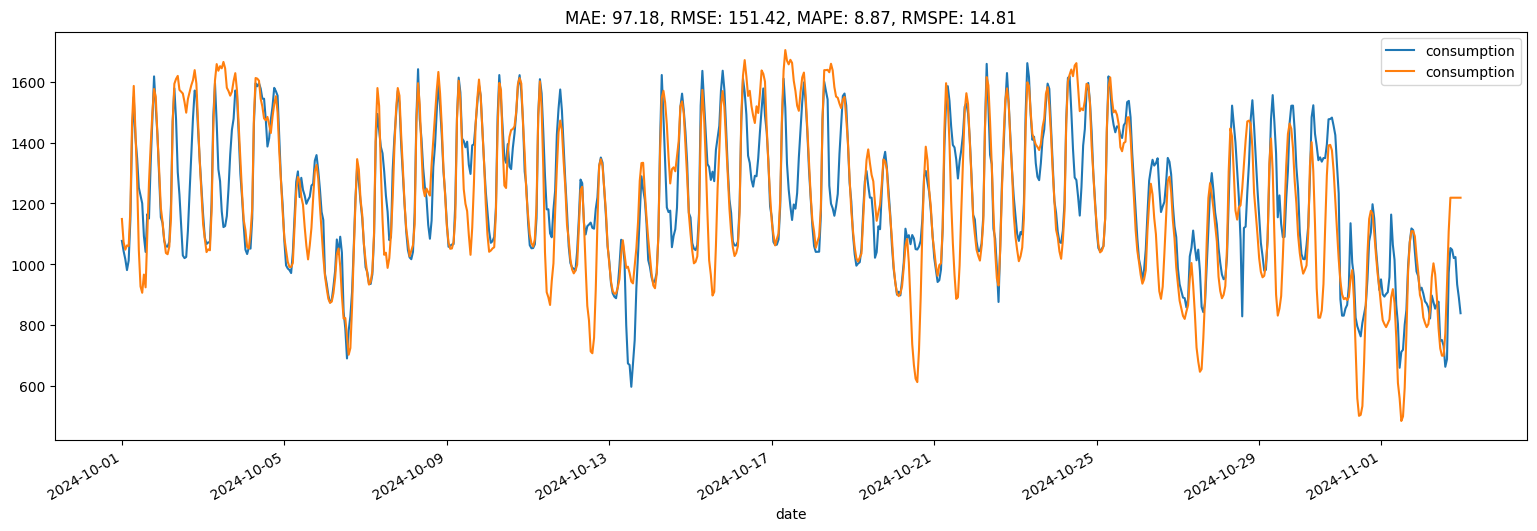

In [39]:
# forecast.index = date['date']
# y_test.index = date['date']
forecast.plot(title=plt_title,figsize=(19, 6),legend=True)
ax = y_test.plot(title=plt_title,figsize=(19, 6), legend=True)
# add date to plot as x axis

In [32]:
forecast.to_csv('output_file.csv', header=False,sep=',')
forecast

date
2024-10-01 00:00:00    1076.873283
2024-10-01 01:00:00    1043.351008
2024-10-01 02:00:00    1017.055376
2024-10-01 03:00:00     980.826345
2024-10-01 04:00:00    1012.039785
                          ...     
2024-11-02 19:00:00    1020.439618
2024-11-02 20:00:00    1023.739013
2024-11-02 21:00:00     933.470083
2024-11-02 22:00:00     890.552321
2024-11-02 23:00:00     838.804762
Name: consumption, Length: 791, dtype: float64

#### Grid searching for hyperparameter optimization

In [69]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Define the GBR model
gbr = GradientBoostingRegressor()

# Perform grid search
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
print("Best model:", best_model)

# Evaluate the best model
forecast = best_model.predict(X_test)
mse = root_mean_squared_error(y_test, forecast)
print("RMSE:", mse)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

```
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best model: GradientBoostingRegressor(max_depth=5, min_samples_split=10, n_estimators=200)
RMSE: 103.08038690634775
```

#### Train for tommorow

In [40]:
from sklearn.ensemble import GradientBoostingRegressor # type: ignore
from sklearn.metrics import mean_absolute_percentage_error # type: ignore

df_hourly = df.copy()
df_hourly['shifted_consumption_168'] = df_hourly['consumption'].shift(168)
df_hourly['shifted_consumption_48'] = df_hourly['consumption'].shift(48)
df_hourly['hour'] = df_hourly.index.hour
df_hourly['weekDay'] = df_hourly.index.weekday

In [41]:
df_hourly.tail()

,consumption_eles_forecast,consumption,temperature,precipitation,irradiation,price,volumes,cloudiness,holiday,shifted_consumption_168,shifted_consumption_48,hour,weekDay
date,,,,,,,,,,,,,
2024-11-03 19:00:00,1758.0,1219.0,13.8,0.0,0.0,100.83,1688.000,83.0,0,1267.0,1109.0,19,6
2024-11-03 20:00:00,1758.0,1219.0,13.8,0.0,0.0,100.83,1959.700,83.0,0,1229.0,1092.0,20,6
2024-11-03 21:00:00,1758.0,1219.0,13.8,0.0,0.0,100.83,1276.654,83.0,0,1183.0,1027.0,21,6
2024-11-03 22:00:00,1758.0,1219.0,13.8,0.0,0.0,100.83,1110.300,83.0,0,1130.0,973.0,22,6
2024-11-03 23:00:00,1758.0,1219.0,13.8,0.0,0.0,100.83,948.000,83.0,0,1075.0,899.0,23,6


In [47]:
# train_data in entire dataset
cutoff_date = '2024-11-03 00:00:00'
train_data = df_hourly[df_hourly.index < cutoff_date].dropna(how='any')
test_data = df_hourly[df_hourly.index >= cutoff_date]

In [58]:
X_train

,shifted_consumption_168,hour,weekDay,shifted_consumption_48,holiday,volumes
date,,,,,,
2022-01-08 01:00:00,1018.0,1,5,1268.0,0,1237.000
2022-01-08 02:00:00,975.0,2,5,1224.0,0,1232.000
2022-01-08 03:00:00,944.0,3,5,1271.0,0,1109.000
2022-01-08 04:00:00,936.0,4,5,1264.0,0,1120.000
2022-01-08 05:00:00,952.0,5,5,1360.0,0,1128.000
...,...,...,...,...,...,...
2024-11-02 19:00:00,1274.0,19,5,1166.0,0,1546.887
2024-11-02 20:00:00,1288.0,20,5,1104.0,0,1467.100
2024-11-02 21:00:00,1238.0,21,5,1032.0,0,1365.087


In [59]:
X_test

,shifted_consumption_168,hour,weekDay,shifted_consumption_48,holiday,volumes
date,,,,,,
2024-11-03 00:00:00,989.0,0,6,865.0,0,786.100
2024-11-03 01:00:00,933.0,1,6,816.0,0,1218.500
2024-11-03 02:00:00,880.0,2,6,803.0,0,987.500
2024-11-03 03:00:00,830.0,3,6,793.0,0,1119.200
2024-11-03 04:00:00,820.0,4,6,805.0,0,1091.500
2024-11-03 05:00:00,844.0,5,6,818.0,0,1420.200
2024-11-03 06:00:00,865.0,6,6,891.0,0,1527.400
2024-11-03 07:00:00,952.0,7,6,918.0,0,1609.100
2024-11-03 08:00:00,1004.0,8,6,872.0,0,1470.300


In [49]:
y_train

date
2022-01-08 01:00:00    1358.0
2022-01-08 02:00:00    1326.0
2022-01-08 03:00:00    1344.0
2022-01-08 04:00:00    1333.0
2022-01-08 05:00:00    1376.0
                        ...  
2024-09-30 19:00:00    1581.0
2024-09-30 20:00:00    1564.0
2024-09-30 21:00:00    1444.0
2024-09-30 22:00:00    1333.0
2024-09-30 23:00:00    1218.0
Name: consumption, Length: 23898, dtype: float64

In [63]:
X_train = train_data[['shifted_consumption_168','hour','weekDay','shifted_consumption_48', 'holiday', 'volumes']]
X_test = test_data[['shifted_consumption_168','hour','weekDay','shifted_consumption_48', 'holiday', 'volumes']]
y_train = train_data['consumption']
y_test = test_data['consumption']

from sklearn.ensemble import HistGradientBoostingRegressor

# reg = HistGradientBoostingRegressor(random_state=0,
# 									learning_rate=0.1,
# 									loss='squared_error',
# 									max_iter=5000)

reg = GradientBoostingRegressor(random_state=0,
								learning_rate=0.1,
								n_estimators=500,
								max_depth=10, 
								min_samples_split=10)
reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, min_samples_split=10, n_estimators=500,
                          random_state=0)

In [64]:
forecast = pd.Series(reg.predict(X_test), index=X_test.index, name='consumption')
forecast

date
2024-11-03 00:00:00     872.252294
2024-11-03 01:00:00     819.263518
2024-11-03 02:00:00     733.861984
2024-11-03 03:00:00     736.963741
2024-11-03 04:00:00     801.211567
2024-11-03 05:00:00     833.338357
2024-11-03 06:00:00     834.323672
2024-11-03 07:00:00     896.977190
2024-11-03 08:00:00     795.239480
2024-11-03 09:00:00     670.099635
2024-11-03 10:00:00     572.621827
2024-11-03 11:00:00     513.592641
2024-11-03 12:00:00     646.590772
2024-11-03 13:00:00     472.848299
2024-11-03 14:00:00     606.422199
2024-11-03 15:00:00     663.027590
2024-11-03 16:00:00     775.731514
2024-11-03 17:00:00     851.949380
2024-11-03 18:00:00     977.773188
2024-11-03 19:00:00    1110.499390
2024-11-03 20:00:00    1150.103835
2024-11-03 21:00:00    1103.800796
2024-11-03 22:00:00    1036.674160
2024-11-03 23:00:00     891.683182
Name: consumption, dtype: float64

<Axes: title={'center': 'MAE: 97.18, RMSE: 151.42, MAPE: 8.87, RMSPE: 14.81'}, xlabel='date'>

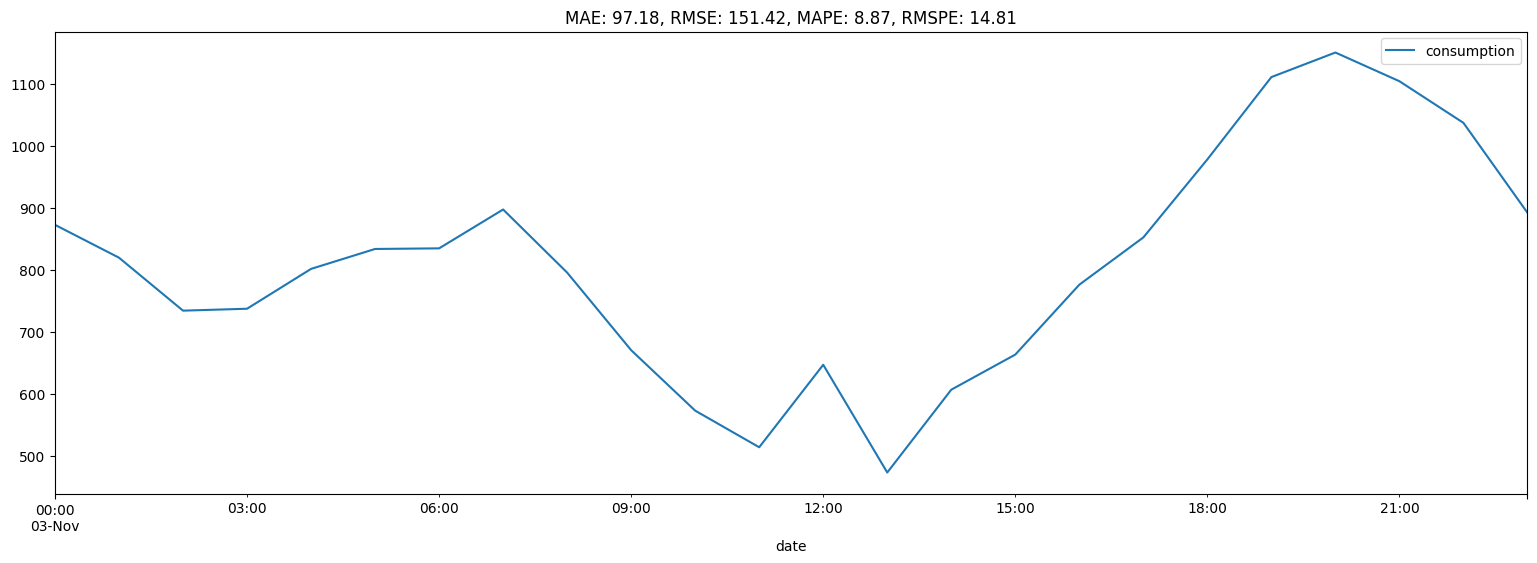

In [65]:
# y_test.index = date['date']
forecast.plot(title=plt_title,figsize=(19, 6),legend=True)
# ax = y_test.plot(title=plt_title,figsize=(19, 6), legend=True, x=date['date'])
# add date to plot as x axis

In [67]:
forecast.to_csv('output.csv', header=None)